**Google Playstore Analysis Using Python.**

Dataset has the information about the Apps,Rating & Downloads of Google Playstore.

**Importing Libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Read Data.**

In [2]:
df=pd.read_csv("googleplaystore-dataset.csv")

**Exploring Dataset.**

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* Dataset has 10841 rows and 13 columns.
* Categorical features - Category,Type,Content rating,Genres,
* Numerical features - Rating,reviews,size,install,price,current version
* There are null values in Rating,Type,Content rating,Current version,Android version.

Find out null values in the dataframe.

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

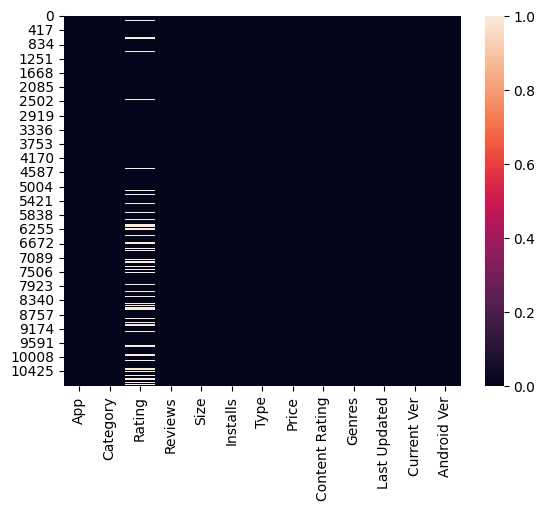

In [8]:
sns.heatmap(df.isnull())
plt.show()

Dropping the null values as it does not make a big difference.

In [9]:
df.dropna(axis = 0, inplace =True)

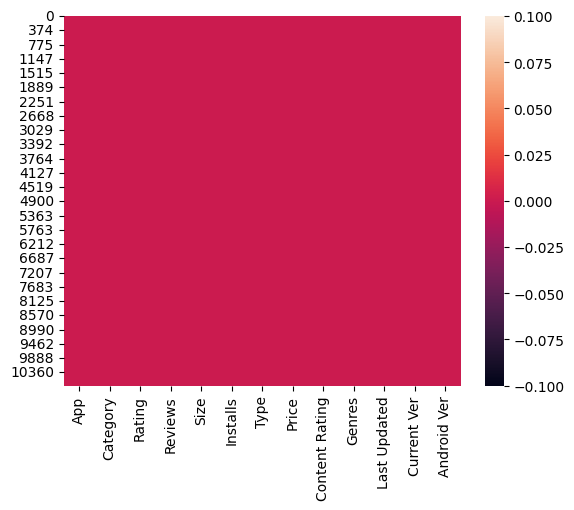

In [10]:
sns.heatmap(df.isnull())
plt.show()

Now check the duplicate values in the dataframe.

In [11]:
df.duplicated().sum()

474

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.duplicated().sum()

0

* There were around 474 duplicate values.
* We have dropped them.

Check the unique categories and drop the categories which are invalid.

In [14]:
list(pd.unique(df['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [15]:
df=df[df['Category']!='1.9']

* We have removed a category named 1.9 which is invalid.

Deleting the unecessary columns. 
Here in the dataframe current version and android version are unnecessary for analysis .
So we are dropping those columns

In [17]:
df=df.drop(['Current Ver','Android Ver'],axis=1)

Changing the datatypes of required columns and making them in a proper way.

In [19]:
df['Reviews']=df['Reviews'].astype('int')
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Installs']=pd.to_numeric(df['Installs'].replace({'\+': '', ',': ''}, regex=True))
df['Price']= pd.to_numeric(df['Price'].replace({'\$': '', ',': ''}, regex=True))

Adding a new column updated_year from the exsisting column Last updated.

In [ ]:
df['updated_year'] = df['Last Updated'].dt.year

**Exploratory Data Analysis.**

**Top categories**

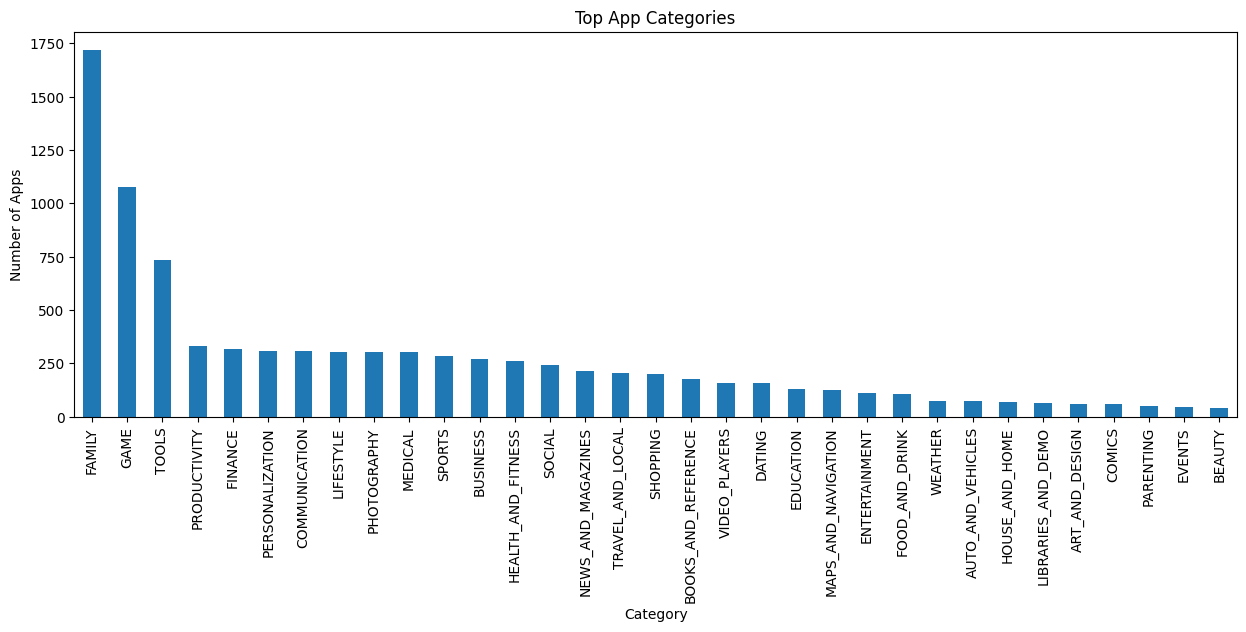

In [32]:
plt.figure(figsize=(15,5))
df.Category.value_counts().plot(kind="bar")
plt.title("Top App Categories")
plt.ylabel("Number of Apps")
plt.show()

* From the graph we can say that Family, Game and Tools are top 3 categories.

In [33]:
app_type_count=df.Type.value_counts()
app_type_count

Type
Free    8275
Paid     611
Name: count, dtype: int64

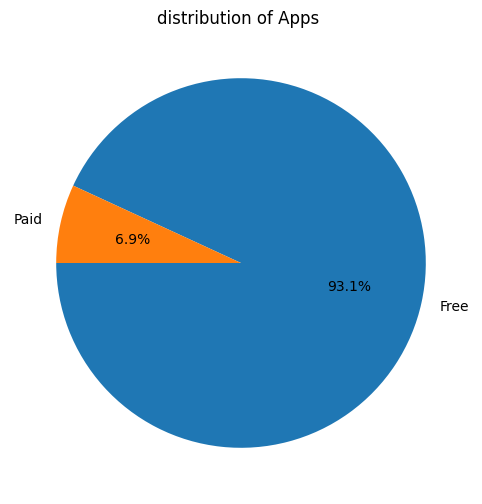

In [34]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Apps ")
plt.pie(app_type_count, labels=app_type_count.index, autopct='%1.1f%%', startangle=180);

* From graph we can say that only 7% apps are paid and rest 93% are free for users.

In [35]:
app_content_ratings=df['Content Rating'].value_counts()
app_content_ratings

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

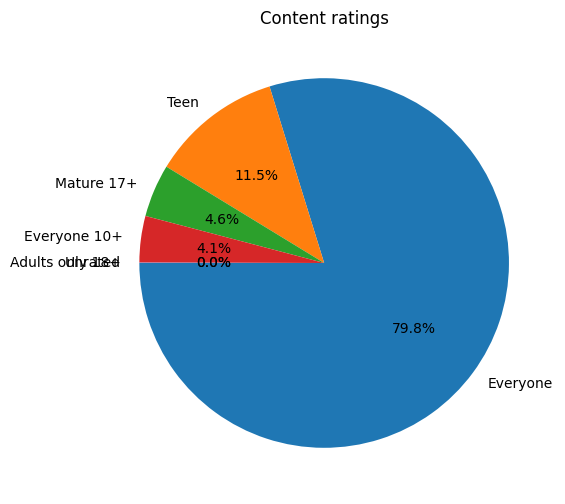

In [38]:
plt.figure(figsize=(12,6))
plt.title("Content ratings")
plt.pie(app_content_ratings, labels=app_content_ratings.index, autopct='%1.1f%%', startangle=180);

* We can say that almost 80% apps can be used by everyone .

**Show all the records which have 5.0 rating.**

In [24]:
df[(df.Rating == 5.0)]

App   Category  Rating  Reviews  \
329                  Hojiboy Tojiboyev Life Hacks     COMICS     5.0       15   
612                 American Girls Mobile Numbers     DATING     5.0        5   
615                                  Awake Dating     DATING     5.0        2   
633                         Spine- The dating app     DATING     5.0        5   
636    Girls Live Talk - Free Text and Video Chat     DATING     5.0        6   
...                                           ...        ...     ...      ...   
10721                           Mad Dash Fo' Cash       GAME     5.0       14   
10742                       GKPB FP Online Church  LIFESTYLE     5.0       32   
10776                            Monster Ride Pro       GAME     5.0        1   
10820                             Fr. Daoud Lamei     FAMILY     5.0       22   
10837            Fr. Mike Schmitz Audio Teachings     FAMILY     5.0        4   

       Size Installs  Type Price Content Rating     Genres Last Updated  \
329     37M   1,000+  Free     0       Everyone     Comics   2018-06-26   
612    4.4M   1,000+  Free     0     Mature 17+     Dating   2018-07-17   
615     70M     100+  Free     0     Mature 17+     Dating   2018-07-24   
633    9.3M     500+  Free     0           Teen     Dating   2018-07-14   
636    5.0M     100+  Free     0     Mature 17+     Dating   2018-08-01   
...     ...      ...   ...   ...            ...        ...          ...   
10721   16M     100+  Free     0       Everyone     Arcade   2017-06-19   
10742  7.9M   1,000+  Free     0       Everyone  Lifestyle   2017-12-31   
10776   24M      10+  Free     0       Everyone     Racing   2018-03-05   
10820  8.6M   1,000+  Free     0           Teen  Education   2018-06-27   
10837  3.6M     100+  Free     0       Everyone  Education   2018-07-06   

       updated_year  
329            2018  
612            2018  
615            2018  
633            2018  
636            2018  
...             ...  
10721          2017  
10742          2017  
10776          2018  
10820          2018  
10837          2018  

[271 rows x 12 columns]

* We have 271 apps which have 5.0 rating.

**Show all the records which have rating less than 2.0.**

In [25]:
df[(df.Rating <= 2.0)]

App   Category  Rating  \
518                       Just She - Top Lesbian Dating     DATING     1.9   
625                             House party - live chat     DATING     1.0   
663                       Just She - Top Lesbian Dating     DATING     1.9   
4006                                            C by GE  LIFESTYLE     1.7   
4010                        Bridge-C - Get More Storage      TOOLS     2.0   
...                                                 ...        ...     ...   
10324                    FE Mechanical Engineering Prep     FAMILY     1.0   
10400           Familial Hypercholesterolaemia Handbook    MEDICAL     1.0   
10562                                       FK Atlantas     SPORTS     1.5   
10578                   Check Lottery Tickets - Florida     FAMILY     2.0   
10591  Lottery Ticket Checker - Florida Results & Lotto      TOOLS     1.0   

       Reviews  Size  Installs  Type Price Content Rating         Genres  \
518        953   19M  100,000+  Free     0     Mature 17+         Dating   
625          1  9.2M       10+  Free     0     Mature 17+         Dating   
663        954   19M  100,000+  Free     0     Mature 17+         Dating   
4006       686  6.6M   10,000+  Free     0       Everyone      Lifestyle   
4010        24   35M    1,000+  Free     0       Everyone          Tools   
...        ...   ...       ...   ...   ...            ...            ...   
10324        2   21M    1,000+  Free     0       Everyone      Education   
10400        2   33M      100+  Free     0       Everyone        Medical   
10562        2   26M        5+  Free     0       Everyone         Sports   
10578       27   31M    5,000+  Free     0           Teen  Entertainment   
10591        3   41M      500+  Free     0       Everyone          Tools   

      Last Updated  updated_year  
518     2018-07-18          2018  
625     2018-07-31          2018  
663     2018-07-18          2018  
4006    2018-07-11          2018  
4010    2017-12-29          2017  
...            ...           ...  
10324   2018-07-27          2018  
10400   2018-07-02          2018  
10562   2018-02-21          2018  
10578   2017-10-17          2017  
10591   2017-12-12          2017  

[67 rows x 12 columns]

* 67 apps have least rating which is less than 2.0.

**How many apps are paid and how are free for the users??**

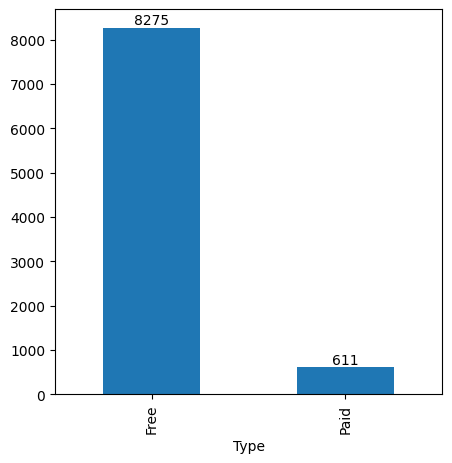

In [26]:
plt.figure(figsize=(5,5))
df.Type.value_counts().plot(kind="bar")
counts = df.Type.value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


* 611 are paid apps and 8275 are free apps from the dataframe.

In [28]:
df.sample(3)

App  Category  Rating  Reviews  Size  \
6837             SkyTest BU/GU Lite  BUSINESS     2.9       28   20M   
8681  Download Instant DP (Full HD)     TOOLS     4.3     1283  4.4M   
2230                   ABCmouse.com    FAMILY     4.3    50887   91M   

        Installs  Type   Price Content Rating               Genres  \
6837        500+  Paid  $17.99       Everyone             Business   
8681    100,000+  Free       0       Everyone                Tools   
2230  5,000,000+  Free       0       Everyone  Education;Education   

     Last Updated  updated_year  
6837   2017-10-24          2017  
8681   2018-08-04          2018  
2230   2018-07-03          2018